In [1]:
avURL <- "https://reputation.alienvault.com/reputation.data"

In [2]:
avRep <- "data/reputation.data"

In [3]:
if (file.access(avRep)){
    download.file(avURL, avRep)
}

In [4]:
av <- read.csv(avRep,sep="#",header=FALSE)

In [6]:
colnames(av) <- c("IP", "Reliability", "Risk", "Type", "Country", "Locale", "Coords", "x")

In [8]:
head(av)

IP,Reliability,Risk,Type,Country,Locale,Coords,x
2.50.14.159,4,2,Malicious Host,AE,Dubai,"25.2581996918,55.3046989441",3
1.34.85.100,4,2,Malicious Host,TW,,"23.5,121.0",3
5.188.9.30,4,2,Malicious Host,RU,Saint Petersburg,"59.8944015503,30.2642002106",3
5.188.87.9,4,2,Malicious Host,RU,Saint Petersburg,"59.8944015503,30.2642002106",3
14.136.81.28,4,2,Malicious Host,HK,Central District,"22.2833003998,114.150001526",3
14.136.49.221,4,2,Malicious Host,HK,Tuen Mun,"22.3999996185,113.983299255",3


In [9]:
summary(av$Reliability)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.000   4.000   3.911   4.000  10.000 

In [10]:
summary(av$Risk)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   2.000   2.222   2.000   6.000 

In [11]:
table(av$Reliability)


    1     4     5     6     7     8     9    10 
 2451 35214     1   744     2    22   419    34 

In [12]:
table(av$Risk)


    1     2     3     4     5     6 
    1 30501  8162   211    11     1 

In [14]:
summary(av$Type, maxsum=10)

Malicious Host                Spamming Spamming;Malicious Host 
                  37552                    1334                       1

In [15]:
summary(av$Country, maxsum=40)

CN      US      JP      KR      BR      RU      TR      TW              IN 
  10170    4152    4038    3198    1896    1348    1277    1113     918     792 
     HK      FR      RO      UA      VN      PL      BG      GB      IT      NL 
    738     606     523     447     445     431     425     374     359     335 
     DE      AR      CO      CH      ES      MX      SE      CA      IL      TH 
    328     302     293     277     255     250     223     213     197     155 
     IR      VE      SG      AU      PR      CL      PE      ID      MD (Other) 
    151     139     133     116     116     112     105     102      86    1749

In [16]:
library(ggplot2)

In [17]:
country.top20 <-names(summary(av$Country))[1:20]

In [19]:
gg <- ggplot(data=subset(av, Country %in% country.top20), aes(x=reorder(Country, Country, length)))

In [20]:
gg <- gg + geom_bar(fill="#000099")

In [21]:
gg <- gg + labs(title="Country Counts", x="Country", y="Count")

In [22]:
gg <- gg + coord_flip()

In [24]:
gg <- gg + theme(panel.grid=element_blank(), panel.background=element_blank())

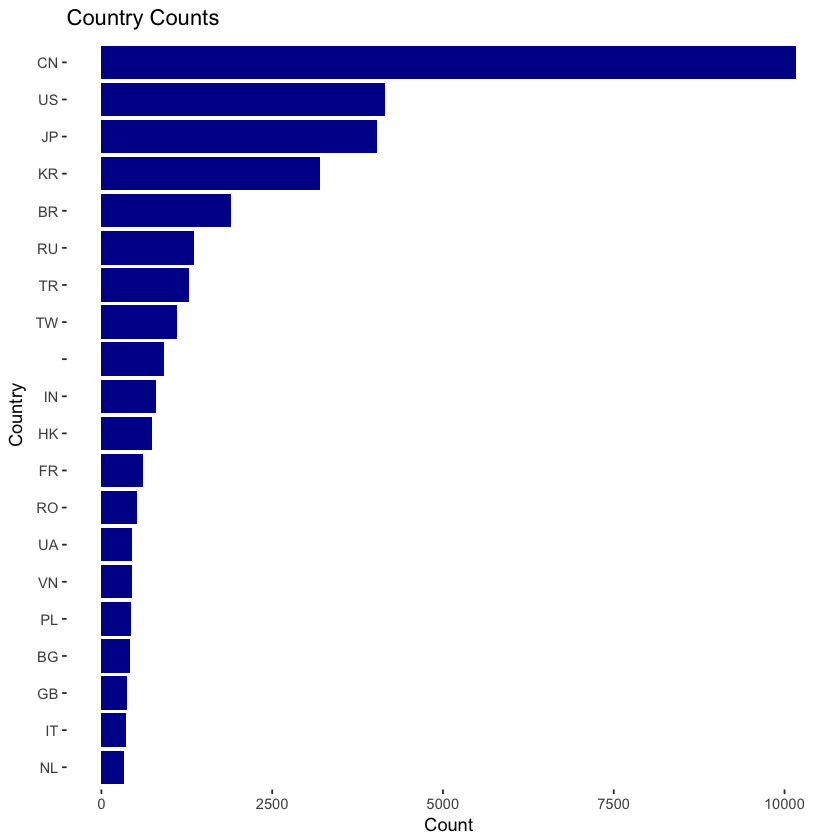

In [25]:
print (gg)

In [26]:
gg <- ggplot(data=av, aes(x=Reliability))

In [27]:
gg <- gg + geom_bar(fill="#000099")

In [28]:
gg <- gg + scale_x_discrete(limits=seq(max(av$Reliability)))

In [29]:
gg <- gg + labs(title="Reliability Counts", x="Reliability Score", y="Count")

In [30]:
gg <- gg + theme(panel.grid=element_blank(), panel.background=element_blank())

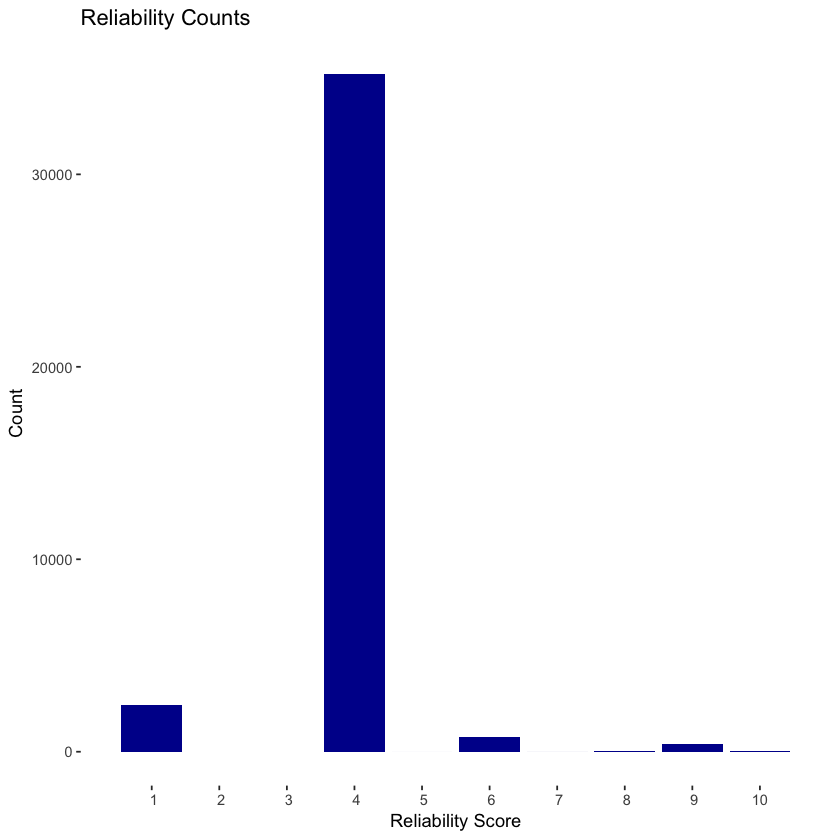

In [31]:
print(gg)

In [32]:
gg <- ggplot(data=av, aes(x=Risk))

In [33]:
gg <- gg + geom_bar(fill="#000099")

In [34]:
gg <- gg + scale_x_discrete(limits=seq(max(av$Risk)))

In [35]:
gg <- gg + labs(title="Risk Counts", x="Risk Score", y="Count")

In [36]:
gg <- gg + theme(panel.grid=element_blank(), panel.background=element_blank())

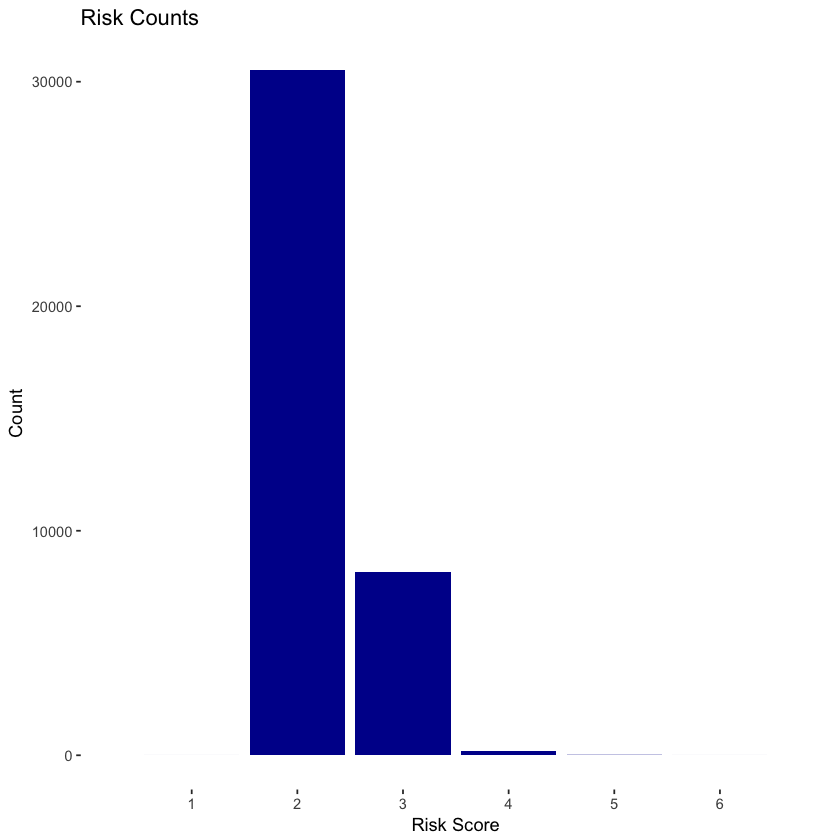

In [37]:
print(gg)